In [2]:
#import required libraries 
#import OpenCV library
import cv2
#import matplotlib library
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# cv2.cvtColor is an OpenCV function to convert images to different color spaces
def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [4]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
    #just making a copy of image passed, so that passed image is not changed 
    img_copy = colored_img.copy()          

    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)          

    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);          

    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)              

    return img_copy

# 作業: 
1. 使用faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5); 
修改 scaleFactor, minNeighbor兩個參數計算 test5.jpg 有幾張臉

2. load cascade classifier training file for haarcascade 
3. load cascade classifier training file for lbpcascade 


In [53]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1, minNeighbors = 5):
    #just making a copy of image passed, so that passed image is not changed 
    img_copy = colored_img.copy()          

    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)          

    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=minNeighbors);          

    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)              

    return img_copy, len(faces)

Faces found:  6


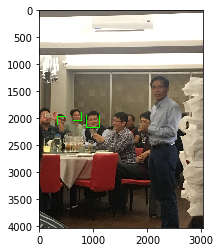

In [62]:
#load cascade classifier training file for haarcascade 
haar_face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_alt.xml')

#load another image 
test5 = cv2.imread('data/test5.jpg')  
 
#call our function to detect faces 
faces_detected_img, num_detected_face = detect_faces(haar_face_cascade, test5, 1.1, 2)  
 
#convert image to RGB and show image 
plt.imshow(convertToRGB(faces_detected_img))

#print the number of faces found 
print('Faces found: ', num_detected_face)

Faces found:  26


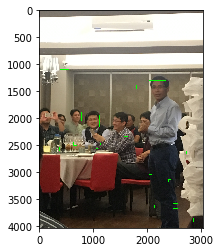

In [63]:
#load cascade classifier training file for lbpcascade
lbp_face_cascade = cv2.CascadeClassifier('data/lbpcascade_frontalface.xml')

#load another image 
test5 = cv2.imread('data/test5.jpg')  
 
#call our function to detect faces 
faces_detected_img, num_detected_face = detect_faces(lbp_face_cascade, test5, 1.1, 2)  
 
#convert image to RGB and show image 
plt.imshow(convertToRGB(faces_detected_img))

#print the number of faces found 
print('Faces found: ', num_detected_face)